## Gradient Boosting 모델로 유방암 진단 기계학습 시스템 만들기 [git](https://github.com/boringariel/scikit-learn/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EC%9C%A0%EB%B0%A9%EC%95%94%20%EC%A7%84%EB%8B%A8.ipynb)
### 

In [3]:
# 패키지 및 데이터 불러오기
import matplotlib.pyplot as plt
import numpy as np

# 차원축소
from sklearn.decomposition import PCA
import pandas as pd
# train_set , test_set 을 나눠준다.
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

x = np.load('data/X.npy')
y = np.load('data/Y.npy')


In [6]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
pca = PCA(n_components=20)

# 50*50px, 5547 샘플
# 5547 * 50 * 50 * 3«

In [11]:
5547 * 50 * 50 * 3

41602500

In [16]:
x_reshape = np.reshape(x,(5547,50*50*3))

In [12]:
# X의 형태를 5547*50*50*3에서 5547*7500의 2차원 배열로 변환
X_reshape = np.reshape(x, (x.shape[0], x.shape[1] * x.shape[2] * x.shape[3]))

In [34]:
pca.fit(x_reshape)

PCA(n_components=20)

In [35]:
x_pca = pca.transform(x_reshape)

In [21]:
print(x_pca.shape)

(5547, 2)


In [31]:
x_df = pd.DataFrame(x_pca, columns=['PCA1',"PCA2"])

x_df['class'] = y

<Axes: xlabel='PCA1', ylabel='PCA2'>

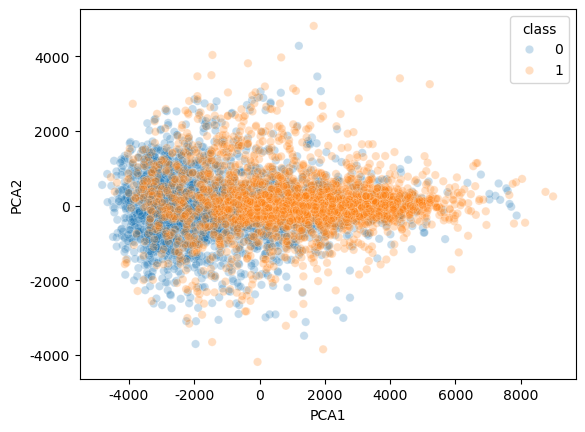

In [52]:
sns.scatterplot(
    data=x_df,
    x='PCA1',
    y='PCA2',
    hue='class',
    alpha=0.25)

In [42]:
# train_set : 0.8, test_set = 0.2
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=.2)

In [46]:
gb = GradientBoostingClassifier(n_estimators=1000,max_depth=3,learning_rate=.1,random_state=12345)

In [47]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=12345)

In [48]:
gb.score(x_train, y_train)

0.9803921568627451

In [49]:
gb.score(x_test,y_test)

0.754054054054054